### Data Preprocessing

In [58]:
import pandas as pd
import numpy as np

In [59]:
df_trks = pd.read_csv('https://api.vitaldb.net/trks')
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_labs = pd.read_csv('https://api.vitaldb.net/labs')

* df_trks chech

In [60]:
df_trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


* If df_trks['tname'] == 'SNUADC/PLETH'

In [61]:
df_trks['tname'].unique() 

array(['BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/EMG', 'BIS/SEF',
       'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Primus/AWP', 'Primus/CO2',
       'Primus/COMPLIANCE', 'Primus/ETCO2', 'Primus/EXP_DES',
       'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
       'Primus/FIO2', 'Primus/INCO2', 'Primus/INSP_DES',
       'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV',
       'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR', 'Primus/PIP_MBAR',
       'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_AGE',
       'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW',
       'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_TM',
       'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV',
       'Primus/SET_TV_L', 'Primus/TV', 'Primus/VENT_LEAK', 'SNUADC/ART',
       'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH',
       'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP',
       'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2',
       'Solar8000/FIO2', '

In [62]:
df_trks_id = set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid'])

In [63]:
len(df_trks_id)

6157

In [64]:
len(set(df_trks_id))

6157

In [65]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [66]:
len(df_cases.columns)

74

* Only SNUADC/PLETH id

In [67]:
df_k = df_cases[df_cases['caseid'].map(lambda x: x in df_trks_id)]

In [68]:
df_k

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


* ica : label(up, norm, down)

In [69]:
lab_k_id = list(set(df_labs[df_labs['name'] == 'k']['caseid']))

In [70]:
df_labs_k = df_k[df_k['caseid'].map(lambda x: x in lab_k_id)]

In [71]:
df_labs_k

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
5,6,5586,0,5145,-51,4749.0,2649,4449,-300600,131400,...,0,70,0.0,100,40,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [72]:
def anocut(x):
  if 3.5 <= x <= 5.5:
    output = 0
  elif x > 5.5:
    output = 1
  else:
    output = -1
  return output

In [73]:
df_labs['label'] = df_labs[df_labs['name'] == 'k']['result'].map(lambda x : anocut(x))

In [74]:
df_labs = df_labs.dropna()

In [75]:
df_labs

,caseid,dt,name,result,label
58,1,3060,k,2.8,-1.0
59,1,12614,k,2.8,-1.0
60,1,8921,k,2.9,-1.0
61,1,-154782,k,3.1,-1.0
62,1,-123020,k,3.1,-1.0
...,...,...,...,...,...
928363,6387,231033,k,4.0,0.0
928364,6387,58994,k,4.4,0.0
928424,6388,3503,k,2.7,-1.0
928425,6388,6649,k,3.3,-1.0


* drop_duplicates

In [76]:
id_lb = df_labs[['caseid', 'dt', 'label']]

In [77]:
id_lb

,caseid,dt,label
58,1,3060,-1.0
59,1,12614,-1.0
60,1,8921,-1.0
61,1,-154782,-1.0
62,1,-123020,-1.0
...,...,...,...
928363,6387,231033,0.0
928364,6387,58994,0.0
928424,6388,3503,-1.0
928425,6388,6649,-1.0


In [78]:
max(id_lb['dt'])

7775588

In [79]:
min(abs(id_lb['dt']))

37

In [80]:
abs(id_lb['dt']).sort_values()[:10]

571127     37
665919     70
390220    137
606088    147
743668    254
278289    288
890224    294
566286    381
540026    432
446685    437
Name: dt, dtype: int64

* remove dt < 300 

In [81]:
caseid, dt, label = id_lb.iloc[1]

In [82]:
id_lb_1000 = id_lb[2000:2500]

In [83]:
abs(id_lb_1000['dt']).sort_values()[:10]

39393    1243
37057    1304
35246    1321
37277    1379
36829    1405
33794    1502
35528    1530
37536    1629
40112    1633
32657    1823
Name: dt, dtype: int64

In [84]:
id_lb_1000

,caseid,dt,label
32036,241,23439,0.0
32037,241,601898,0.0
32038,241,21848,0.0
32039,241,168742,0.0
32040,241,394665,0.0
...,...,...,...
40783,293,12845,0.0
40784,293,182098,0.0
40785,293,-1593799,0.0
40918,295,1883,0.0


In [85]:
import vitaldb

* ecg

In [86]:
dt_list = []
dt_signal_5 = []
dt_signal_3 = []
dt_signal_1 = []
lb_list = []
id = []
for idx in range(len(id_lb_1000)):
    caseid, dt, label = id_lb_1000.iloc[idx]
    vals = vitaldb.load_case(caseid, ['SNUADC/ECG_II'], 1/60).flatten() # scale : dt <-> vals
    if dt < len(vals) and dt > 300: 
        dt_list.append(dt)
        dt_signal_5.append(vals[int(dt)-300:int(dt)]) # sequence range
        dt_signal_3.append(vals[int(dt)-180:int(dt)]) # sequence range
        dt_signal_1.append(vals[int(dt)-60:int(dt)]) # sequence range
        lb_list.append(label)
        id.append(caseid)
    else:
        pass

In [87]:
data = list(dt_signal_1)

In [88]:
df = pd.DataFrame(data)

In [89]:
label = list(lb_list)

In [90]:
df['label'] = label

In [91]:
df['label'].value_counts()

 0.0    270
-1.0     32
 1.0     10
Name: label, dtype: int64

In [92]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 15 hz
lowcut = 0.5
highcut = 15

In [93]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 100, order=5)
    dt_signal_1_bp.append(yy)

In [94]:
data = list(dt_signal_1_bp)

In [95]:
label = list(lb_list)

In [96]:
df['label'] = df['label'].map(lambda x : True if x == 0 else False)

In [97]:
df_drop = df.dropna()

In [98]:
df_drop

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
1,0.030398,0.060022,0.069896,0.069896,0.079771,0.079771,0.109395,0.119269,0.129144,-0.009100,...,1.383210,0.573499,0.237764,0.178517,0.148893,0.089645,-0.009100,-0.048599,-0.078222,True
3,1.205470,1.017860,0.909235,0.869736,1.007980,1.057350,1.027730,1.057350,1.007980,0.899360,...,0.524127,0.099520,-0.167093,-0.167093,-0.127595,-0.107846,-0.097971,-0.088097,-0.107846,True
4,0.316761,0.287137,0.257513,0.563625,0.642621,0.267388,0.178517,0.139018,0.158767,0.139018,...,-0.068348,-0.088097,-0.048599,-0.018975,0.010649,0.040273,-0.018975,-0.048599,-0.028849,True
5,1.590580,1.284470,1.185720,1.096850,1.037600,0.968482,0.899360,0.830238,0.790740,0.711743,...,-0.246090,-0.206592,-0.265839,-0.295463,-0.236215,-0.265839,-0.236215,-0.196717,-0.127595,True
10,-0.700320,-1.065680,-1.105180,-1.134800,-1.115050,-0.739818,-0.670696,-0.680571,-0.789191,-1.134800,...,0.287137,0.237764,0.198266,0.198266,0.168642,0.395757,0.711743,0.297011,0.030398,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-0.078222,-0.048599,0.010649,0.089645,0.168642,0.218015,0.168642,0.030398,-0.088097,-0.147344,...,-0.127595,-0.127595,-0.117721,-0.107846,-0.068348,0.000774,0.030398,0.030398,-0.038724,True
308,-0.097971,-0.088097,-0.058473,0.000774,0.060022,0.129144,0.178517,0.158767,0.060022,-0.058473,...,-0.068348,-0.068348,-0.058473,-0.038724,-0.038724,-0.038724,-0.038724,-0.028849,0.020523,True
309,0.079771,-0.206592,-0.157219,0.158767,0.148893,0.139018,0.376008,0.583374,0.376008,0.277262,...,-0.255965,-0.364585,0.069896,0.257513,0.060022,0.020523,-0.038724,-0.315212,-0.720069,True
310,-0.058473,0.050147,0.020523,0.010649,0.010649,0.010649,0.010649,0.000774,0.030398,0.060022,...,0.119269,0.109395,0.079771,0.069896,0.060022,0.050147,0.060022,0.050147,0.050147,True


In [99]:
raw_data_norm = df_drop.values

In [100]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

In [101]:
# minmaxnormalization
min_val = tf.reduce_min(np.float32(data))
# max
max_val = tf.reduce_max(np.float32(data))

In [102]:
test_data = (data - min_val) / (max_val - min_val)

In [103]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [104]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(60, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(60, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [105]:
autoencoder.load_weights('/workspace/weights/k/ecg/weight')

In [107]:
encoded_imgs = autoencoder.encoder(test_data).numpy()
# noral_test_data : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

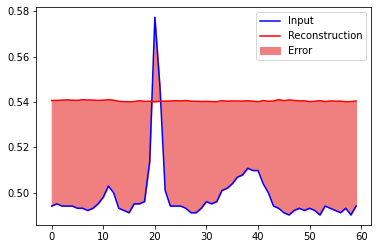

In [108]:
plt.plot(test_data[44], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[44], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[44], test_data[44], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [109]:
def predict(model, data, threshold):
    # model, data, threshold input
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    # mae
    return tf.math.less(loss, threshold)
    #  loss < threshold : Normal

In [110]:
def print_stats(preds, labels):
    print('Accuracy = {}'.format(accuracy_score(labels, preds)))
    print('Precision = {}'.format(precision_score(labels, preds)))
    print('Recall = {}'.format(recall_score(labels, preds)))
    print('Confusion Matrix = {}'.format(confusion_matrix(labels, preds)))

In [111]:
reconstructions = autoencoder(test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)

In [112]:
preds = predict(autoencoder, test_data, 0.06311271488666534)

In [113]:
preds = preds.numpy()

In [114]:
def bi2num(x):
    if x == True:
        return 1
    else:
        return 0

In [115]:
preds_ans = []
for i in preds:
    preds_ans.append(bi2num(i))

In [116]:
test_concat_label_ans = []
for i in labels:
    test_concat_label_ans.append(bi2num(i))

In [117]:
print_stats(preds_ans, test_concat_label_ans)

Accuracy = 0.8271186440677966
Precision = 0.8717948717948718
Recall = 0.937007874015748
Confusion Matrix = [[  6  35]
 [ 16 238]]
